# Basics of mobile robotics project - The Thytanic Navigation (2024)

## 1. Introduction & Context

| **Contributors**         | **Sciper**  | **Role**             | **Studies**                                                                   |
|---------------------------|-------------|-----------------------|---------------------------------------------------------------------------  |
| **Alessio Desogus**       | 301705      | `Local Navigation`      | Bachelor and Master in Mechanical Engineering                              |
|   **Antoine Bachmann**    |  336641     | `Global navigation`      | Bachelor and Master in Computer Science                                   |
|**Ramon Heeb**             |   396213    | `Vision`                | Bachelor in Computer Science, Master in Robotics                           |
| **Adélaïde Pinel**        |330753       |  `Kalman Filtering`                     |  Bachelor and Master in Mechanical Engineering             |

Date of deliverable: 05.12.2024  

Our main sources were: 
- .
- .

### Project Description

This project involves guiding the **Thytanic** from its starting position to its destination in an efficient manner using `Global Navigation`. Along the way, the Thytanic must avoid appearing obstacles by employing `Local Navigation`. Additionally, the position of the Thytanic is estimated using a `Kalman Filter`. Finally, a stationary camera is positioned above the map to provide `Vision` information for the system’s navigation modules.

Imagine the following scenario: the Thytanic is navigating in the vast ocean (**blue background**) and is seeking to reach land (**green area**) safely while avoiding dangerous icebergs (**white obstacles**). At the same time, it must avoid colliding with **black zones** representing dangerous land masses. Its goal is to navigate the shortest, most energy-efficient route to safety.


![Local Navigation Algorithm](img/thytanic.png)

- Image reference background: https://www.freepik.com/premium-ai-image/iceberg-water-with-icebergs-background_55113664.htm
- Image reference thymio: https://edu.ge.ch/site/desrobotsenclasse/wp-content/uploads/sites/269/2015/02/front.jpg


## 2. Initialization

We start by importing the necessary modules, functions and basic libraries:  
- `local_navigation_and_control_all` for the local navigation and overall control of the Thytanic  
- `vision` for computer vision functions  
- `global_navigation` for global path planning functions  
- `kalman_filtering_all` for Kalman filter functions

In [7]:
from local_navigation_and_control import ThytanicController, ThytanicState
from vision import get_current_state, init_cam
from global_navigation import downsamplingprep, downsampling, pathfinder
from kalman_filtering import kalman_filter
import numpy as np
import matplotlib.pyplot as plt
import time

Next, we initialize the `ThytanicController`: 

In [8]:
thytanic = ThytanicController()

## 3. Vision

In [9]:
#turn the image into a 4-channel map
cam = init_cam()
obstacle_range=[np.array([0, 130, 0]), np.array([160, 240, 150])]
target_range=[np.array([0, 30, 235]), np.array([255, 130, 256])]
th_front_range=[np.array([0, 160, 250]), np.array([15, 250, 256])]
th_back_range=[np.array([16, 130, 120]), np.array([40, 250, 249])]
img, _, _ = get_current_state(
    cam=cam,
    obstacle_range=obstacle_range,
    target_range=target_range,
    th_front_range=th_front_range,
    th_back_range=th_back_range,
)

## 4. Global Navigation


[]

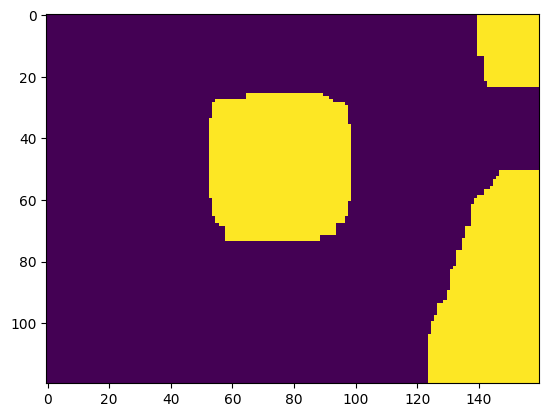

In [10]:
endsize = [120, 160]

#this line generates the original enposition, thymio position, and the obstacle channel
thymiopos, endpos, obstacleimage = downsamplingprep(img, endsize, 1, 1)

#this line turns obstacleimage into its downsampled version with enlarged obstacles
preppedimage = downsampling(obstacleimage, endsize, 25, 0.2)


plt.imshow(preppedimage)
plt.plot()

[]

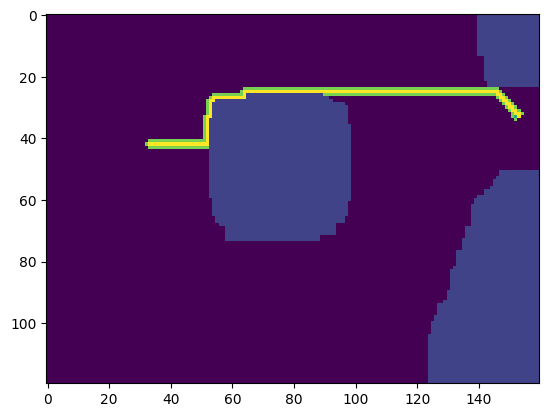

In [11]:
path, exploredpoints, unexploredpoints = pathfinder(thymiopos, endpos, preppedimage)

testimage = preppedimage.copy()

for k in path:
    testimage[k[0], k[1]] += 2
    
for k in exploredpoints:
    testimage[k[0], k[1]] += 3

for k in unexploredpoints:
    testimage[k[0], k[1]] += 4


plt.imshow(testimage)
plt.plot()

## 5. Kalman Filter

## 6. Local Navigation

For the local navigation of the Thytanic, we implemented a state machine with 3 distinct states:  
- `GLOBAL_MOVEMENT`  
- `AVOIDING_OBSTACLE`  
- `STOP`  

The navigation begins in the `GLOBAL_MOVEMENT` state, where the Thytanic follows the optimal path provided. When a proximity sensor (*prox.horizontal*) detects an obstacle based on a pre-defined threshold, the Thytanic transitions to the `AVOIDING_OBSTACLE` state. In this state, it initiates avoidance maneuvers by turning to navigate around the obstacle. 

Once the sensors no longer detect any obstacles, the Thytanic moves straight for 3 seconds to create distance from the obstacle. It then updates the next point on the optimal path by skipping ahead two steps to ensure efficiency and prevent revisiting the same obstacle. After completing these maneuvers, the Thytanic transitions back to the `GLOBAL_MOVEMENT` state, following its journey along the optimal path. The `STOP` state is triggered when the Thytanic reaches its goal, at which point it halts completely, stopping all motors.  

![Local Navigation Algorithm](img/local_navigation.png)

Reguarding the **kidnapping scenario**, which simulates the thymio being lifted and placed elsewhere, the event is detected using the accelerometer by identifying an unexpected force in the z-axis. Upon detection, the Thytanic immediately stops its movement, sets its wheel speeds to zero, and waits for 10 seconds to stabilize before recalibrating. During this recalibration, the robot re-evaluates its position using the camera which captures the surrounding environment. Based on this new information, a new optimal path is calculated from the updated position to the target. Once the new path is successfully computed, the Thytanic's state is switched back to `GLOBAL_MOVEMENT`. 

![Kidnapping Scenario](img/kidnapping_scenario.png)

- The mermaid charts were done using the following website: https://www.mermaidchart.com

## 7. Main Loop

Connecting to Thytanic...
Connection established!
initital_angle: -0.0018920174734227135
Thytanic state set to GLOBAL_MOVEMENT.
accelerometer: 0
accelerometer: 0
accelerometer: 20
goal [43 42]
x 32.75747186501141 y 41.6356098244875 theta 0.014994979514784564
goal index 0
delta_x 10.24252813498859 delta_y 0.3643901755124972
alpha -0.05055617644879763
v 50 omega -1.8200223521567147
left speed 52.479812463211616
right speed 44.24637801297886
accelerometer: 0
accelerometer: 0
accelerometer: 20
goal [43 42]
x 32.73084632994227 y 41.66616428596091 theta -0.006269180406495968
goal index 0
delta_x 10.269153670057733 delta_y 0.33383571403908974
alpha -0.02622796581767091
v 50 omega -0.9442067694361527
left speed 50.49880102610558
right speed 46.22738945008489
accelerometer: 0
accelerometer: 0
accelerometer: 20
goal [43 42]
x 32.99299721639253 y 41.67873332233498 theta 0.0054848593607813865
goal index 0
delta_x 10.007002783607469 delta_y 0.32126667766502237
alpha -0.037578022375682515
v 50 omega

c:\Users\ramon\anaconda3\envs\mob_rob\Lib\site-packages\numpy\lib\_function_base_impl.py:562: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\ramon\anaconda3\envs\mob_rob\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Look at me, no camera!
goal [141  25]
x 111.98015979483841 y 27.103537275809078 theta -0.159056564573493
goal index 23
delta_x 29.019840205161586 delta_y -2.103537275809078
alpha 0.23141618698072158
v 107.85919956195212 omega 8.330982731305976
left speed 85.4842053031009
right speed 123.17198432567554
accelerometer: 0
accelerometer: 0
accelerometer: 20
Look at me, no camera!
goal [141  25]
x 112.90381608734386 y 27.411646881756656 theta -0.016468055135862955
goal index 23
delta_x 28.096183912656144 delta_y -2.4116468817566563
alpha 0.10209356783014727
v 106.8577317058321 omega 3.6753684418853014
left speed 95.04607972786489
right speed 111.67274648877459
accelerometer: 1
accelerometer: 0
accelerometer: 22
Look at me, no camera!
goal [141  25]
x 113.93202103494748 y 27.575100532491422 theta 0.07321949673081478
goal index 23
delta_x 27.067978965052518 delta_y -2.5751005324914225
alpha 0.021629613675084924
v 50 omega 0.7786660923030573
left speed 46.60182669598118
right speed 50.124363780

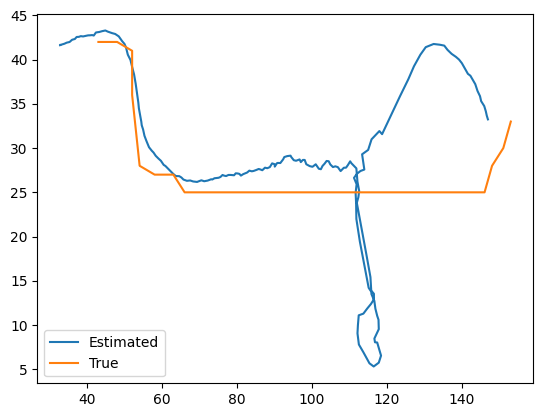

In [12]:
# Main script to establish connection and start movement
try:
    print("Connecting to Thytanic...")
    thytanic.establish_connection()
    print("Connection established!")
    _, thymiopos, initital_angle = get_current_state(    cam=cam,
    obstacle_range=[np.array([0, 150, 25]), np.array([30, 220, 100])],
    target_range=[np.array([0, 30, 235]), np.array([255, 130, 256])],
    th_front_range=[np.array([0, 160, 250]), np.array([15, 250, 256])],
    th_back_range=[np.array([16, 130, 150]), np.array([35, 250, 249])],)
    # Set the robot to GLOBAL_MOVEMENT state
    print("initital_angle:", initital_angle)
    thytanic.x_est = np.array([thymiopos[1], 0, thymiopos[0], 0,initital_angle,0]) #position, velocity (x,y,angle)
    thytanic.P_est = np.eye(6) # TO TUNE
    thytanic.goal_idx = 0
    thytanic.robot_state = ThytanicState.GLOBAL_MOVEMENT
    #thytanic.set_wheel_speed(100, 100)
    print("Thytanic state set to GLOBAL_MOVEMENT.")
    x_estimated = []
    ########################
    
    path = path[::5]
    path = path[2:]
    path = np.array([[p[1], p[0]] for p in path])
    ##########################
    # Start the robot movement loop
    while True:
        acc = thytanic.read_accelerometer()
        if(acc[2] > 28):
            print("kidnapping initiated:", acc[2])
            thytanic.set_wheel_speed(0, 0)
            time.sleep(10)
            #Recomputing new position and path
            img, thymiopos, initital_angle = get_current_state(cam=cam,
                obstacle_range=obstacle_range,
                target_range=target_range,
                th_front_range=th_front_range,
                th_back_range=th_back_range,
            )
            endsize = [120, 160]

            #this line generates the original enposition, thymio position, and the obstacle channel
            thymiopos, endpos, obstacleimage = downsamplingprep(img, endsize, 1, 1)

            #this line turns obstacleimage into its downsampled version with enlarged obstacles
            preppedimage = downsampling(obstacleimage, endsize, 20, 0.2)
            path, exploredpoints, unexploredpoints = pathfinder(thymiopos, endpos, preppedimage)  

            # Set the robot to GLOBAL_MOVEMENT state
            print("initital_angle:", initital_angle)
            thytanic.x_est = np.array([thymiopos[1], 0, thymiopos[0], 0,initital_angle,0]) #position, velocity (x,y,angle)
            thytanic.P_est = np.eye(6) # TO TUNE
            thytanic.goal_idx = 0
            thytanic.robot_state = ThytanicState.GLOBAL_MOVEMENT
            #thytanic.set_wheel_speed(100, 100)
            print("Thytanic state set to GLOBAL_MOVEMENT.")
            x_estimated = []
            ########################
            #new path
            path = path[::5]
            path = path[2:]
            path = np.array([[p[1], p[0]] for p in path])  
        _, thymiopos, orientation = get_current_state(    cam=cam,
            obstacle_range=obstacle_range,
            target_range=target_range,
            th_front_range=th_front_range,
            th_back_range=th_back_range,
        )
        # apply kalman filter and get the estimated positions thytanic.x_est
        kalman_filter(thytanic, [thymiopos[1], thymiopos[0], orientation])
        x_estimated.append(thytanic.x_est)
        #print("x_est", thytanic.x_est)
        thytanic.goal = path[thytanic.goal_idx] # get the (x,y) coordinates of the goal point
        print("goal", thytanic.goal)
        #print("goal_idx", thytanic.goal_idx)
        thytanic.update_robot_state()

        # Print the proximity sensor values
        sensor_values = thytanic.read_proximity_sensors()
        #print("Proximity sensor readings -- threshold of 2000 for detection:", sensor_values)
        
        if thytanic.goal_idx >= len(path):
            thytanic.robot_state = ThytanicState.STOP
            thytanic.update_robot_state()
            print("Goal reached!")
            break 

except KeyboardInterrupt:
    # Handle interruption and stop the robot safely
    print("\nStopping the Thytanic...")
    thytanic.disconnect()
    print("Thytanic stopped and disconnected.")

finally:
    print("Session ended.")
    plt.figure()
    plt.plot(np.array(x_estimated)[:,0], np.array(x_estimated)[:,2], label='Estimated')
    plt.plot(path[:,0], path[:,1], label='True')
    # Plot the path
    plt.legend()
    thytanic.disconnect()

## 9. Conclusion